# ANOMALY DETECTION
## Algorithms:
1. KNN
2. HBOS
3. LOF

## Imports

In [1]:
import pandas as pd
import numpy as np
#basics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from pyod.models.knn import KNN
from pyod.models.hbos import HBOS
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get list of column names in excel style
def get_excel_columns(n_cols):
    col_list = []
    n = n_cols
    alpha_list = [chr(c) for c in range(ord('A'), ord('Z') + 1)]
    alpha_list.insert(0,'dummy')
    for i in range(1,n+1):
        col_i = ""
        index_list=[]
        p=[]
        while i>26:
            k = i%26
            i = i//26
            if k==0:
                index_list.append(26)
                i = i-1
            else:
                index_list.append(k)
        index_list.append(int(i))
        index_list.reverse()
        for i in index_list:
            p.append(alpha_list[i])
            col_i = "".join(p)
        col_list.append(col_i)
    return col_list

# Functions 

## 1. KNN

In [3]:
def apply_KNN(X_train, X_test, y_train, y_test, low = 1, high = 30):
#     X = df[get_excel_columns(len(df.columns) - 1)].values.astype(float)
#     X = StandardScaler().fit(X).transform(X.astype(float))
#     y = df.iloc[:, -1]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = randomState)
    accuracy = []
    error_rate = []
    for i in range(low, high+1):
        KNN = KNeighborsClassifier(n_neighbors = i)
        KNN.fit(X_train, y_train)
        y_hat = KNN.predict(X_test)
        n_errors = np.count_nonzero(y_hat != y_test)
        accuracy.append((len(y_test)-n_errors)/len(y_test)*100)
        error_rate.append(np.mean(y_hat != y_test))
    sns.lineplot(range(low, high+1), accuracy)
    

In [4]:
def roc_KNN(X_train, X_test, y_train, y_test, k = 20):
#     X = df[get_excel_columns(len(df.columns) - 1)].values.astype(float)
#     X = StandardScaler().fit(X).transform(X.astype(float))
#     y = df.iloc[:, -1]
#     y = LabelEncoder().fit_transform(y)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = randomState)
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.fit_transform(y_test)
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train, y_train)
    #get probability scores
    y_scores = KNN.predict_proba(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_scores[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    #plot
    plt.figure(figsize = (10,10))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of kNN')
    plt.show()

## 2. HBOS

In [5]:
def apply_HBOS(X_train, X_test, y_train, y_test, low = 1, high = 10):
#     X = df[get_excel_columns(len(df.columns) - 1)].values.astype(float)
#     X = StandardScaler().fit(X).transform(X.astype(float))
#     y = df.iloc[:, -1]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = randomState)

    # change type of y_test to match y_hat = clf.predict(X_test)
#     y_test = y_test.to_numpy().astype(str)
#     y_test = np.where(y_test == 'n', 0, 1)
    accuracy = []
    error_rate = []
    for i in range(low, high + 1):
        clf = HBOS(n_bins = i)
        clf.fit(X_train)
        y_hat = clf.predict(X_test)
        n_errors = np.count_nonzero(y_hat != y_test)
        error_rate.append(n_errors)
        accuracy.append((len(y_test)-n_errors)/len(y_test)*100)
    plt.plot(range(low, high+1), accuracy)
        

In [6]:
def roc_HBOS(X_train, X_test, y_train, y_test, bins):
#     X = df[get_excel_columns(len(df.columns) - 1)].values.astype(float)
#     X = StandardScaler().fit(X).transform(X.astype(float))
#     y = df.iloc[:, -1]
#     y = LabelEncoder().fit_transform(y)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = randomState)
    
#     y_test = y_test.to_numpy().astype(str)
#     y_test = np.where(y_test == 'n', 0, 1)
    clf = HBOS(n_bins = bins)
    clf.fit(X_train)
    #get probability scores
    y_scores = clf.predict_proba(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_scores[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    #plot
    plt.figure(figsize = (10,10))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of HBOS')
    plt.show()

## 3. LOF

In [7]:
def apply_LOF(X, y, low=1, high=20, contamination = 'auto'):
#     X = df[get_excel_columns(len(df.columns) - 1)].values.astype(float)
#     X = StandardScaler().fit(X).transform(X.astype(float))
#     y = df.iloc[:, -1]
    # change y values to match y_hat = clf.fit_predict(X)
#     y = y.to_numpy().astype(str)
#     y = np.where(y == 'o', -1, 1)
    accuracy = []
    error_rate = []
    for i in range(low, high+1):
        clf = LocalOutlierFactor(n_neighbors = i, contamination = contamination)
        y_hat = clf.fit_predict(X)
        y_hat_enc = np.where(y_hat == -1, 1,0)
        n_errors = np.count_nonzero(y_hat_enc != y)
        error_rate.append(n_errors/len(y))
        accuracy.append((len(y) - n_errors)/len(y)*100)
    sns.lineplot(range(low, high+1), accuracy)
    

In [8]:
def apply_LOF_novelty(X_train, X_test, y_train, y_test, low=1, high=20, contamination = 'auto'):
#     X = df[get_excel_columns(len(df.columns) - 1)].values.astype(float)
#     X = StandardScaler().fit(X).transform(X.astype(float))
#     y = df.iloc[:, -1]
#     y = LabelEncoder().fit_transform(y)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = randomState) 
#     # extract only the inliers from X_train
    y_train_list = []
    for i in y_train:
        y_train_list.append(i)
    j=0
    X_train_list = []
    for i in X_train:
        m = []
        m = i.tolist()
        m.append(y_train_list[j])
        X_train_list.append(m)
        j = j+1
    df_rejoined = pd.DataFrame(X_train_list)
    # df_rejoined[30].value_counts()
    df_rejoined_inliers = df_rejoined.loc[df_rejoined.iloc[:,-1] == 0]
    df_rejoined_inliers
    X_train_inliers = df_rejoined_inliers.iloc[:, 0:-1].to_numpy()
    X_train_inliers
    accuracy = []
    plt.figure(figsize = (10,6))

    for i in range(low,high+1):
        clf = LocalOutlierFactor(n_neighbors = i, novelty = True, contamination = 'auto')
        clf.fit(X_train_inliers)
        y_pred = clf.predict(X_test)
        y_pred_enc = np.where(y_pred == -1, 1,0)
        accuracy.append(metrics.accuracy_score(y_test, y_pred_enc)*100)
    sns.lineplot(range(low, high + 1), accuracy)

In [17]:
def roc_LOF_novelty(X_train, X_test, y_train, y_test, neighbors = 20, contamination = 'auto'):
#     clf=LocalOutlierFactor(n_neighbors=neighbors,novelty=True,contamination='auto')
#     clf.fit(X_train)
#     y_pred=clf.predict(X)
    y_train_list = []
    for i in y_train:
        y_train_list.append(i)
    j=0
    X_train_list = []
    for i in X_train:
        m = []
        m = i.tolist()
        m.append(y_train_list[j])
        X_train_list.append(m)
        j = j+1
    df_rejoined = pd.DataFrame(X_train_list)
    df_rejoined_inliers = df_rejoined.loc[df_rejoined.iloc[:,-1] == 0]
    df_rejoined_inliers
    X_train_inliers = df_rejoined_inliers.iloc[:, 0:-1].to_numpy()
    
    clf = LocalOutlierFactor(n_neighbors = neighbors , novelty = True, contamination = 'auto')
    clf.fit(X_train_inliers)
#     clf.fit(X_train)
    y_pred = clf.predict(X_test)
    #y_pred_enc = np.where(y_pred == -1, 1,0)
    y_test = np.where(y_test == 1, -1, 1)
    print(y_test)
    y_decision_fn = clf.decision_function(X_test)
    print(y_decision_fn)
    
#     y_scores = predict_proba(X_test)
#     fpr, tpr, threshold = metrics.roc_curve(y_test, y_scores[:,1])
#     roc_auc = metrics.auc(fpr, tpr)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_decision_fn)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize = (10,10))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of LOF')
    plt.show()

# Data Sets

## 1) Shuttle 

In [18]:
df_shuttle = pd.read_csv("shuttle.csv")
df_shuttle.columns = get_excel_columns(len(df_shuttle.columns))
df_shuttle

,A,B,C,D,E,F,G,H,I,J
0,81.0,0.0,84.0,0.0,-14.0,-2.0,4.0,100.0,96.0,o
1,81.0,0.0,84.0,0.0,-20.0,16.0,4.0,105.0,102.0,o
2,76.0,-1.0,81.0,0.0,-42.0,-3.0,5.0,125.0,120.0,o
3,105.0,0.0,107.0,2.0,70.0,0.0,1.0,37.0,36.0,o
4,79.0,0.0,83.0,-1.0,-40.0,7.0,4.0,124.0,120.0,o
...,...,...,...,...,...,...,...,...,...,...
46458,46.0,5.0,78.0,0.0,46.0,5.0,32.0,32.0,0.0,n
46459,37.0,0.0,79.0,-1.0,10.0,3.0,43.0,69.0,26.0,n
46460,48.0,0.0,78.0,3.0,46.0,0.0,30.0,32.0,2.0,n
46461,41.0,0.0,79.0,0.0,38.0,-25.0,38.0,40.0,2.0,n


In [19]:
X1 = df_shuttle[get_excel_columns(len(df_shuttle.columns) - 1)].values.astype(float)
X1 = StandardScaler().fit(X1).transform(X1.astype(float))
y1 = df_shuttle.iloc[:, -1]
y1 = LabelEncoder().fit_transform(y1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.5)
print("Train Data: ", X_train1.shape, y_train1.shape)
print("Test Data: ", X_test1.shape, y_test1.shape)

Train Data:  (23231, 9) (23231,)
Test Data:  (23232, 9) (23232,)


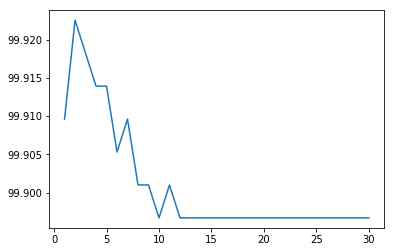

In [137]:
apply_KNN(X_train1, X_test1, y_train1, y_test1)

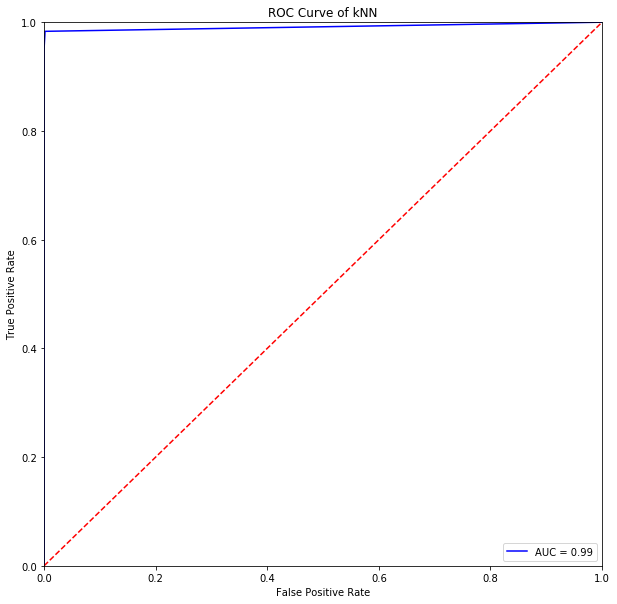

In [138]:
roc_KNN(X_train1, X_test1, y_train1, y_test1, k=20)

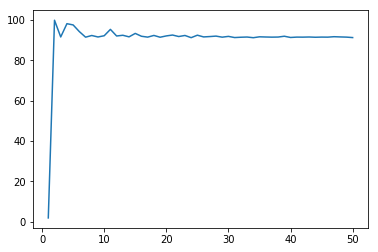

In [106]:
apply_HBOS(X_train1, X_test1, y_train1, y_test1, high = 50)

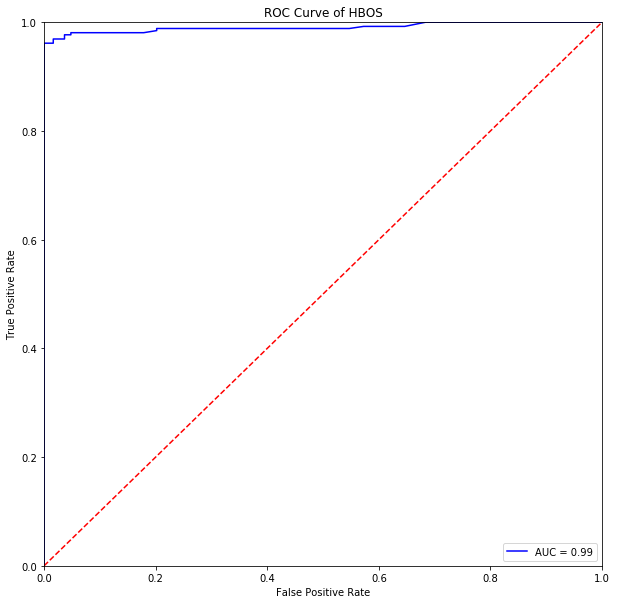

In [107]:
roc_HBOS(X_train1, X_test1, y_train1, y_test1, bins = 20)

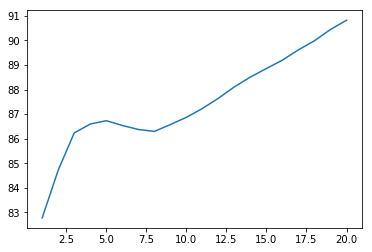

In [108]:
apply_LOF(X1, y1)

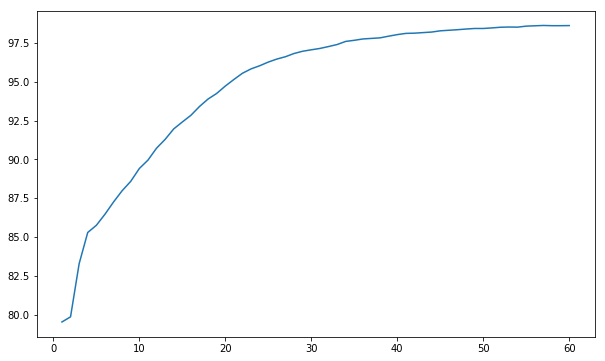

In [109]:
apply_LOF_novelty(X_train1, X_test1, y_train1, y_test1, high = 60)

[1 1 1 ... 1 1 1]
[0.48916216 0.16285963 0.34268848 ... 0.46725208 0.49277298 0.34567051]


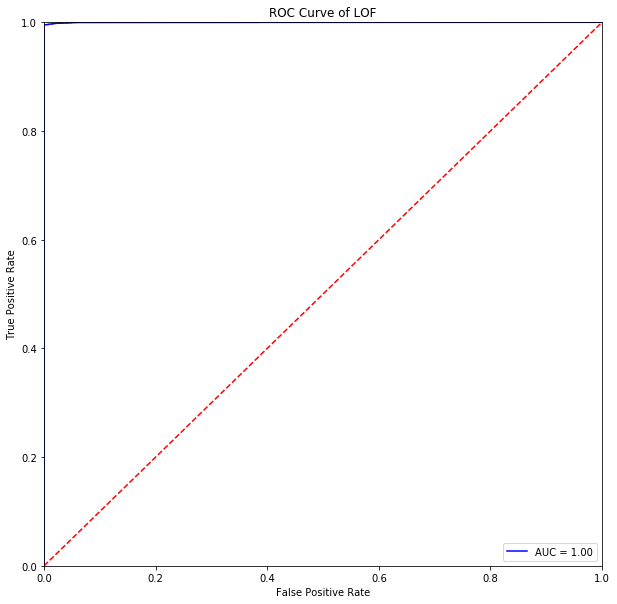

In [22]:
roc_LOF_novelty(X_train1, X_test1, y_train1, y_test1, neighbors = 20)

## 2) Thyroid

In [10]:
df_thyroid = pd.read_csv("thyroid.csv")
df_thyroid.columns = get_excel_columns(len(df_thyroid.columns))
df_thyroid

,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,R,S,T,U,V
0,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02900,0.0150,0.06100,0.096,0.06400,o
1,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.02900,0.0190,0.05800,0.103,0.05600,o
2,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.11400,0.0030,0.02400,0.061,0.03900,o
3,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.04900,0.0030,0.00500,0.116,0.00400,o
4,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.19700,0.0096,0.03121,0.102,0.03042,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00047,0.0080,0.15400,0.075,0.20400,n
6911,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.12500,0.107,0.11700,n
6912,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.12500,0.114,0.10900,n
6913,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.10600,0.088,0.12100,n


In [11]:
X2 = df_thyroid[get_excel_columns(len(df_thyroid.columns) - 1)].values.astype(float)
X2 = StandardScaler().fit(X2).transform(X2.astype(float))
y2 = df_thyroid.iloc[:, -1]
y2 = LabelEncoder().fit_transform(y2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3)
print("Train Data: ", X_train2.shape, y_train2.shape)
print("Test Data: ", X_test2.shape, y_test2.shape)

Train Data:  (4840, 21) (4840,)
Test Data:  (2075, 21) (2075,)


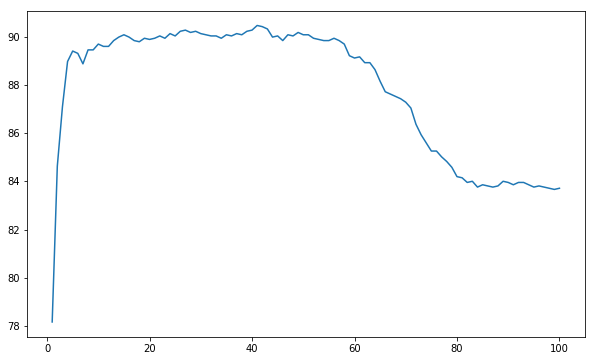

In [12]:
apply_LOF_novelty(X_train2, X_test2, y_train2, y_test2, high = 100)

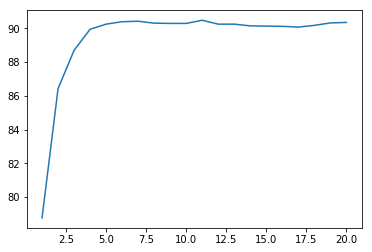

In [15]:
apply_LOF(X2, y2)

In [14]:
roc_LOF_novelty(X_train2, X_test2, y_train2, y_test2, neighbors = 20)

[1 1 1 ... 1 1 1]


NameError: name 'X_test1' is not defined

## 3) HTTP requests

In [55]:
df_requests = pd.read_csv("HBOS_requests.csv")
df_requests.head()
# df_requests.columns = get_excel_columns(len(df_requests.columns))

,0.0,215.0,45076.0,0.0.1,1.0,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,...,0.0.14,0.0.15,0.0.16,0.0.17,0.0.18,0.0.19,0.0.20,0.0.21,0.0.22,n
0,0.0,162.0,4528.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,n
1,0.0,236.0,1228.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,n
2,0.0,233.0,2032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,n
3,0.0,239.0,486.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,n
4,0.0,238.0,1282.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,n


## 4) Breast Cancer

In [26]:
df_bc = pd.read_csv("winconsin_breast_data.csv", header = None)
df_bc.columns = get_excel_columns(len(df_bc.columns))
df_bc.head()

,A,B,C,D,E,F,G,H,I,J,...,V,W,X,Y,Z,AA,AB,AC,AD,AE
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,o
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,o
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,o
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,o
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,o


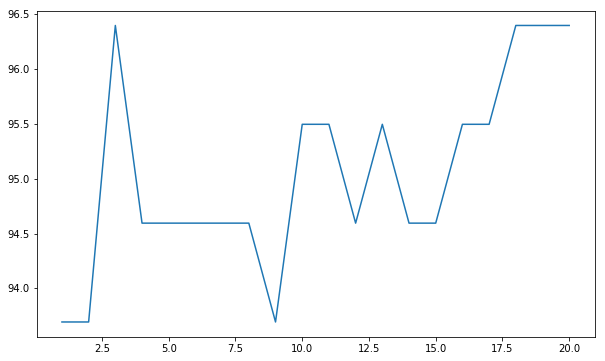

In [36]:
apply_LOF_novelty(df_bc)